In [5]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import dynamicalab.drawing as draw

%matplotlib inline

In [6]:
sizes = np.array([200,200,300])
probs = [[0.15, 0.01, 0.02],
        [0.01, 0.2, 0.01],
        [0.02, 0.01, 0.1]]
G = nx.stochastic_block_model(sizes=sizes, p=probs)

In [7]:
sizes = np.concatenate([[0],sizes])
node_subsets = [range(sizes.cumsum()[i], sizes.cumsum()[i+1]) for i in range(len(sizes)-1)]

True

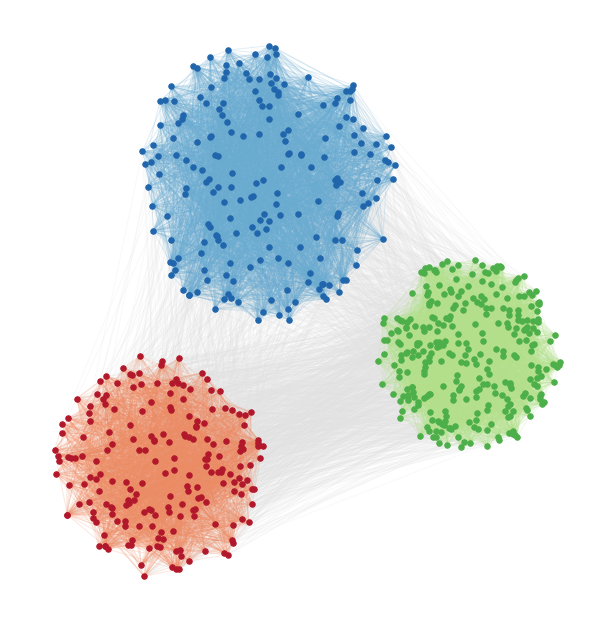

In [8]:
centroids = [(0,0), (2,5), (5.8,2)]
radius_scale = [0.02,0.03, 0.01]

# Get layout
pos, edge_bunchs = draw.clustered_layout(G, node_subsets, centroids, radius_scale)

# Draw
plt.figure(figsize=(10,11))

node_colors = ['#b2182b', '#2166ac', "#4daf4a"]
for i, nodes in enumerate(node_subsets):
    nx.draw_networkx_nodes(G, pos=pos, node_size=30, nodelist=nodes, node_color=node_colors[i])

colors = ['#e0e0e0']*6 + [ '#b2df8a', '#67a9cf', '#ef8a62', ]
for i, edges in enumerate(edge_bunchs):
    nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color=colors[i], alpha=0.2)

# Set lim for nice aspect
xlim , ylim = plt.xlim(), plt.ylim()
lim = [min(xlim[0], ylim[0]), max(xlim[1], ylim[1])]
plt.xlim(lim)
plt.ylim(lim)
plt.axis("off")
True